# Module 1: Data Science Fundamentals

## Sprint 2: Statistical Tests and Experiments

## Let's analyse Udacity A/B test!

<div><img style="height: 350px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Udacity_logo.png" /></div>

## Background

For the last day of this sprint, we are analyzing once run, online Udacity A/B test results! The dataset is part of the Udacity Google's A/B testing course, which we have watched a couple of lessons from in Subproject 2 of this sprint.

Data is available at https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0

---------

## How to start?

The data consists of two sheets, each for different group of the test. Download the sheets as CSVs and union them to form 1 dataset.

## Concepts to explore

You will mostly focus on statistical hypothesis testing in this project on real-life data.

## Requirements

* Visualize 95% confidence interval between control and experiment groups on [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) metric. Explain what the confidence interval means, what's the relationship with the population of a group.
* Verify that the difference in each of the metrics between control and experiment groups is statistically significant using z-test, 95% confidence level.
* Verify that the difference in each of the metrics between control and experiment groups is statistically significant using t-test, 95% confidence level.
* Compare both test method results. Explain why they differ / do not differ that much and why.
* Choose 1 method (either z or t) and explore statistical significance of any metric under different confidence levels - 60%, 90%, 95%, 99%. If conclusions about significance differ under different confidence levels, explain why.
* Calculate p-values.

## Evaluation Criteria

- Correctness of used test methods.
- Soundness of explanations given.
- Adherence to the requirements.


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- Why collect data from sample rather than data from a population?
- What is the Central Limit Theorem and why is it important?
- Explain confidence intervals and significance in statistics
- Explain what p-value is

#### Import Libraries 

In [25]:
import numpy as np #Linear Algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns #data visualization

#### Load dataset

In [2]:
#Load excel workbook
d = pd.read_excel('Final Project Results.xlsx',sheet_name=['Control','Experiment'])

In [3]:
#Join two sheets of excel workbook together using list comprehension
df=pd.concat(d[frame] for frame in d.keys())

#### Drop negigible values

Given that the experiment is carried out to examine the change in enrolment and payment, The last fourteeen days of the experiment seem not important sine you invariable have to wait fouteen days to check if a user will stay given a click.

In [4]:
#Drop last fourteen days
df.drop(df.tail(14).index.tolist(),0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [5]:
d['Control'].dropna(axis=0,inplace=True)
d['Experiment'].dropna(axis=0,inplace=True)

#### Summation


In [7]:
#Cacluted the sum of each column
index = ["page_views","clicks","enrollments","payments"]
results = {"Control":pd.Series([d['Control'].Pageviews.sum(),d['Control'].Clicks.sum(),
                                 d['Control'].Enrollments.sum(),d['Control'].Payments.sum()],
                                  index = index),
           "Experiment":pd.Series([d['Experiment'].Pageviews.sum(),d['Experiment'].Clicks.sum(),
                               d['Experiment'].Enrollments.sum(),d['Experiment'].Payments.sum()],
                               index = index),
           "Full_data":pd.Series([df.Pageviews.sum(),df.Clicks.sum(),df.Enrollments.sum(),
                                  df.Payments.sum()],index = index )
           }
df_results = pd.DataFrame(results)
df_results

,Control,Experiment,Full_data
page_views,212163.0,211362.0,423525.0
clicks,17293.0,17260.0,34553.0
enrollments,3785.0,3423.0,7208.0
payments,2033.0,1945.0,3978.0


#### Functions

In [8]:
def standard_error(p_hat,n):
  standard_error = np.sqrt( ( p_hat * ( 1 - p_hat )  / n))
  return standard_error

In [9]:
def confindence_interval(standard_error,z_score,d_min):  
  margin_of_error = z_score * standard_error
  lcb = d_min - margin_of_error  # lower limit of the Confidence interval
  ucb = d_min + margin_of_error # Lower limit of the confidence interval
  return margin_of_error, lcb,ucb

In [10]:
def standard_error_diff (se_control,se_experiment):
  se_diff = np.sqrt(se_control**2 + se_experiment**2)
  return se_diff

In [11]:
def pooled_standard_error(p_hat_pool, N_control,_N_experiment):
  pooled_standard_error = np.sqrt(p_hat_pool*(1-p_hat_pool)*
             (1/N_control+1/_N_experiment))
  return pooled_standard_error

#### Using Clickthrough rate as a sanity check. 
There was no change made to the button  so the click through rate is expected to be the same if there is no problem with the experimemt setup .
- The null hypothesis states that the is no significant difference between both groups
- The alternative hypothesis states that there is a significant difference
- At 95 percent confidence the z_score is 1.96

In [12]:
p_hat_pool=(df_results['Full_data']['clicks'])/(df_results['Full_data']['page_views'])

In [13]:
p_hat_control=(df_results['Control']['clicks'])/(df_results['Control']['page_views'])

p_hat_experiment=(df_results['Experiment']['clicks'])/(df_results['Experiment']['page_views'])



In [14]:
d_min=p_hat_experiment-p_hat_control
d_min

0.0001527615025272433

##### First approach using the  pooled standard error

In [15]:
pooled_standard_error=pooled_standard_error(p_hat_pool,
                      df_results['Control']['page_views'],
                      df_results['Experiment']['page_views'])
pooled_standard_error

0.0008412290191049275

In [16]:
margin_of_error,lcb,ucb=confindence_interval(pooled_standard_error,1.96,d_min)

##### Second Approach: Calculating the standard errror of the two groups , and finding the difference in standard error

In [17]:
se_control=standard_error(p_hat_control,df_results['Control']['page_views'])
se_experiment=standard_error(p_hat_experiment,df_results['Experiment']['page_views'])

In [18]:
se_diff =standard_error_diff(se_control,se_experiment)

In [19]:
margin_of_error1,lcb1,ucb1=confindence_interval(pooled_standard_error,1.96,d_min)

In [24]:
ucb1,lcb

(0.0018015703799729012, -0.0014960473749184146)

##### Plot of confidence interval

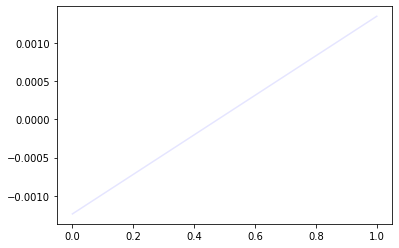

In [20]:
plt.plot([-0.0012390521070649596, 0.0013523062902388316],color='blue', alpha=0.1)
x = [lcb, 0, ucb]
y = [0,0,0]
sns.set()
g=sns.lineplot(x,y)
plt.title('Confidence interval of Click through rate of the two groups')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

  - The confidence interval is between (0.0018015703799729012, -0.0014960473749184146) , and 0 lies with the range,it is safe to accept the null hypothesis
  
 - if dmin is greater thank the margin of error , we reject the null hypothesis. 
 - In this case d_min is less than the margin of error, hence there is no significant differnence between the two groups

#### Evaluation Metrics

Based on the hypothesis of the test we expect to see:
an increase in retention, which means that more students stay after the free trial in the test group.
a decrease in gross conversion, which means that there are less frustrated students in the test group.
not a big impact on net conversion, which means we don’t lose a great amount of paying users in the test group.

##### Metric 1: Rate of Enrollment given a click

In [ ]:
#Calculate click through rate.


##### Metric 2 : Retention( Rate of payment given enrollmenmt )
- That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. 

In [ ]:
#Retention rate for control
retention_control=df_results['Control']
results = {"Control":pd.Series([d['Control'].Pageviews.sum(),d['Control'].Clicks.sum(),
                                 d['Control'].Enrollments.sum(),d['Control'].Payments.sum()],
                                  index = index),


In [ ]:
df.head(20)

,Date,Pageviews,Clicks,Enrollments,Payments,group
0,"Sat, Oct 11",7723,687,134.0,70.0,control
1,"Sun, Oct 12",9102,779,147.0,70.0,control
2,"Mon, Oct 13",10511,909,167.0,95.0,control
3,"Tue, Oct 14",9871,836,156.0,105.0,control
4,"Wed, Oct 15",10014,837,163.0,64.0,control
5,"Thu, Oct 16",9670,823,138.0,82.0,control
6,"Fri, Oct 17",9008,748,146.0,76.0,control
7,"Sat, Oct 18",7434,632,110.0,70.0,control
8,"Sun, Oct 19",8459,691,131.0,60.0,control
9,"Mon, Oct 20",10667,861,165.0,97.0,control


In [ ]:
total_clicks=sum(df['Clicks'])

In [ ]:
total_Page_views=sum(df['Pageviews'])

In [ ]:
total_clicks,total_Page_views

(56703, 690203)

In [ ]:
df=pd.concat([control,treatment])

sum page views sum clicks and divide

In [ ]:
control=pd.read_csv("Control.csv")
treatment=pd.read_csv("Treatment.csv")

In [ ]:
control

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0
5,"Thu, Oct 16",9670,823,138.0,82.0
6,"Fri, Oct 17",9008,748,146.0,76.0
7,"Sat, Oct 18",7434,632,110.0,70.0
8,"Sun, Oct 19",8459,691,131.0,60.0
9,"Mon, Oct 20",10667,861,165.0,97.0


In [ ]:
control.shape

(37, 5)

In [ ]:
treatment.shape

(37, 5)